In [ ]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("/content/cuisine_data.csv")
df.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


In [ ]:
df["cuisine"].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [ ]:
df["cuisine"].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

# Preprocessing

In [ ]:
df.isnull().sum()

cuisine_description    0
cuisine                0
dtype: int64

In [ ]:
df.duplicated().sum()

97

In [ ]:
df.drop_duplicates(inplace = True)
print("Total Number of duplicated:",df.duplicated().sum())
print("Shape of Data:",df.shape)

Total Number of duplicated: 0
Shape of Data: (39677, 2)


In [ ]:
import re

In [ ]:
def preprocess(x):
  x= re.sub("[^a-zA-Z]"," ",x)#Removing non-alphabetic character
  x=x.lower()
  x=x.split()#Splitting the text reviews into list
  x=[word  for word in x if word not in set(stopwords.words('english'))] #Removing Stopwords
  x=" ".join(x) #Converting list to string
  return x

In [ ]:
df["cuisine_description"] = df["cuisine_description"].apply(preprocess)

df.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


# **Vectorization using TF IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf=TfidfVectorizer()
X= tf_idf.fit_transform(df["cuisine_description"].values)
X = pd.DataFrame(X.todense(),columns=tf_idf.get_feature_names_out() )

In [ ]:
X.head()

,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,...,yuzukosho,za,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df.cuisine

# Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

# Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model = model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy Score:",accuracy_score(y_pred,y_test))

Accuracy Score: 0.7436995967741935


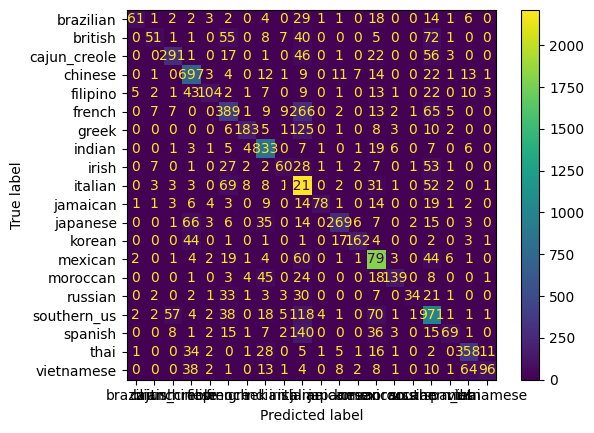

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot()
plt.show()

# Output

In [ ]:
def prediction(a):
  a = np.array([a])
  #Vectorization using TFIDF
  a = tf_idf.transform(a)
  #PREDICTED VALUE
  x = model.predict(a)
  return x

a ="tomato sauce shredded carrots spinach part skim mozzarella cheese italian seasoning english muffins split toasted chopped onion vegetable oil cooking spray chopped green bell pepper"
prediction(a)

array(['italian'], dtype=object)

In [ ]:
import pickle
pickle.dump(model,open("trained_model.pkl","wb"))

In [ ]:
pickle.dump(tf_idf,open("tf_idf.pkl","wb"))